In [73]:
%pip install seaborn --quiet
%pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df = pd.read_csv("../ficheros_csv/restaurants_definitivo.csv", index_col = 0)
df.head()

Name                                         Address  \
id                                                                             
1        Freedom Cakes Diner                Calle Cádiz 7,Madrid,Spain,28004   
2     Mad Mad Vegan - Chueca              Calle Pelayo 19,Madrid,Spain,28004   
3          Frutas Prohibidas    Calle del Conde Duque, 26,Madrid,Spain,28015   
4   Mad Mad Vegan - Lavapiés                  Lavapiés 16,Madrid,Spain,28012   
5              Flower Burger   Calle Luchana 13, Chamberí,Madrid,Spain,28010   

          Lat      Long  Number of Ratings  Restaurant Rating  \
id                                                              
1   40.415876 -3.702805              470.0                4.5   
2   40.422698 -3.698609              410.0                5.0   
3   40.427467 -3.710349              241.0                5.0   
4   40.411113 -3.703039              216.0                4.5   
5   40.430001 -3.701037               14.0                4.5   

             Type of Restaurant  Number of Bookmarks Price Range  \
id                                                                 
1             ['International']                  766    Moderado   
2       ['American', 'Mexican']                  612    Moderado   
3   ['International', 'Fusion']                  555    Moderado   
4       ['American', 'Mexican']                  465    Moderado   
5       ['American', 'Western']                   47      Barato   

     Phone Number                           Website  \
id                                                    
1   +34-910741347       http://www.freedomcakes.es/   
2   +34-914442077          https://madmadvegan.com/   
3   +34-911525533  http://www.frutasprohibidas.com/   
4   +34-910665299          https://madmadvegan.com/   
5   +34-910328968      https://www.flowerburger.it/   

                                       Instagram  \
id                                                 
1          http://www.instagram.com/freedomcakes   
2           http://www.instagram.com/madmadvegan   
3   http://www.instagram.com/frutasprohibidasbar   
4           http://www.instagram.com/madmadvegan   
5       http://www.instagram.com/flowerburger_es   

                                   Facebook  \
id                                            
1     http://facebook.com/Freedomcakesvegan   
2           http://facebook.com/MADMADVEGAN   
3   http://facebook.com/frutasprohibidasbar   
4           http://facebook.com/MADMADVEGAN   
5       http://facebook.com/flowerburger.it   

                                            Timetable  \
id                                                      
1   {'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...   
2   {'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...   
3   {'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...   
4   {'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...   
5   {'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...   

                                                  url  
id                                                     
1   https://www.happycow.net/reviews/freedom-cakes...  
2   https://www.happycow.net/reviews/mad-mad-madri...  
3   https://www.happycow.net/reviews/frutas-prohib...  
4   https://www.happycow.net/reviews/mad-mad-vegan...  
5   https://www.happycow.net/reviews/flower-burger...

### Resumen de los datos estadísticos de nuestros datos

- **Coordenadas (Lat, Long)**: 
  - Los restaurantes están concentrados en una zona específica de Madrid (latitud promedio: **40.42**, longitud promedio: **-3.69**).
  - Baja desviación estándar, indicando proximidad geográfica entre ellos.

- **Número de Valoraciones (`Number of Ratings`)**:
  - Promedio de **12.81** valoraciones, pero con una alta dispersión (máximo: **470**, mínimo: **0**), señalando outliers con muchas valoraciones.

- **Calificación del Restaurante (`Restaurant Rating`)**:
  - Promedio de **3.31** estrellas (máximo: **5**), con la mayoría de los restaurantes obteniendo una calificación aceptable (percentil 25 ≥ 3).

- **Número de Marcadores (`Number of Bookmarks`)**:
  - Promedio de **24.05** marcadores, con una alta variación (máximo: **766**).
  - La mayoría de los restaurantes tienen menos de 13 marcadores (percentil 75), indicando a lo mejor que solo unos pocos son muy populares.


In [38]:
df.describe()

Lat        Long  Number of Ratings  Restaurant Rating  \
count  749.000000  749.000000         741.000000         749.000000   
mean    40.423211   -3.694103          12.812416           3.316422   
std      0.027265    0.036817          42.742202           1.461177   
min     40.302515   -3.876999           0.000000           0.000000   
25%     40.411590   -3.707394           1.000000           3.000000   
50%     40.421919   -3.700555           2.000000           4.000000   
75%     40.430001   -3.690653           6.000000           4.000000   
max     40.543643   -3.538618         470.000000           5.000000   

       Number of Bookmarks  
count           749.000000  
mean             24.056075  
std              77.775177  
min               0.000000  
25%               1.000000  
50%               3.000000  
75%              13.000000  
max             766.000000

### Creación de boxplots para visualizar los datos

1. **Variables Utilizadas**:
   - Se seleccionaron las columnas numéricas de nuestro csv: `'Lat'`, `'Long'`, `'Number of Ratings'`, `'Restaurant Rating'`, y `'Number of Bookmarks'`.

2. **Estructura del Gráfico**:
   - Se usó un bucle `for` para iterar sobre cada variable y crear un subplot para cada una.
   - `plt.boxplot()`:
     - Crea un boxplot para la columna seleccionada.
     - `df[var].dropna()` asegura que se omitan valores nulos al graficar.
   - `plt.subplot(1, len(variables), i)` organiza los gráficos en una sola fila.

3. **Diseño Final**:
   - `plt.tight_layout()` asegura que los gráficos no se superpongan.

El resultado son cinco gráficos boxplot en una sola fila, que permiten analizar la distribución y outliers de cada variable.

---

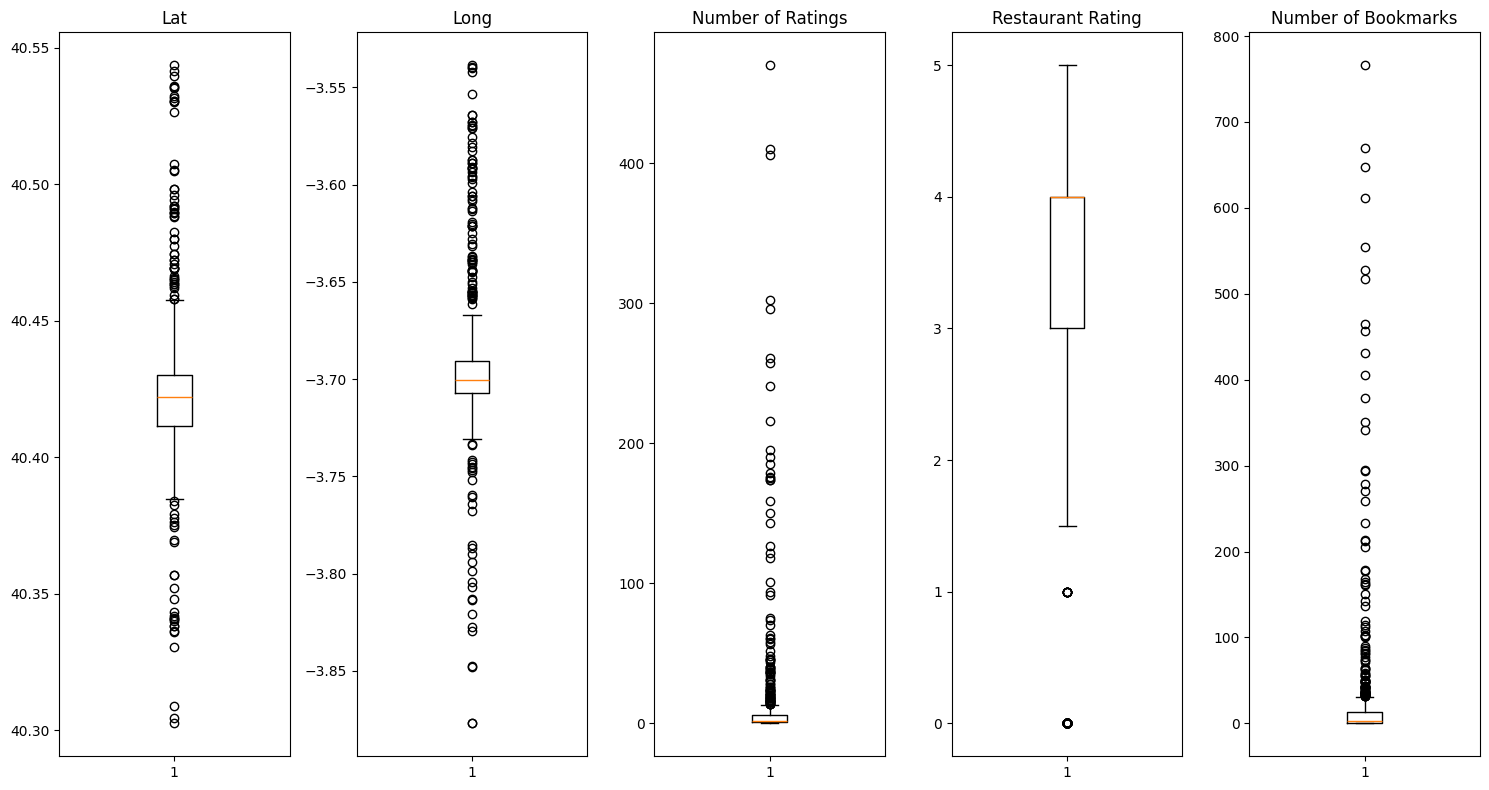

In [39]:
variables = ['Lat', 'Long', 'Number of Ratings', 'Restaurant Rating', 'Number of Bookmarks']

plt.figure(figsize=(15, 8))

for i, var in enumerate(variables, 1):
    plt.subplot(1, len(variables), i)  # Crear subplots
    plt.boxplot(df[var].dropna(), vert=True)
    plt.title(var)  
    plt.ylabel(var)
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [40]:
df[['Number of Ratings', 'Restaurant Rating']].isna().sum() # Contar la cantidad de valores NaN presentes en los datos

Number of Ratings    8
Restaurant Rating    0
dtype: int64

In [41]:
df[df[['Number of Ratings', 'Restaurant Rating']].isna().any(axis=1)].head() # ver los valores NaN

Name  \
id                                                
522                        Aloha Poke - Serrano   
566  Papa John's - Avenida de la Reina Victoria   
617                     Aloha Poke - San German   
629                              Domino's Pizza   
640                  Domino's Pizza - Moratalaz   

                                               Address        Lat      Long  \
id                                                                            
522  Calle de María de Molina, 16, Madrid, Spain, 2...  40.437685 -3.687138   
566  68 Avenida de la Reina Victoria, Madrid, Spain...  40.446189 -3.714035   
617      Calle de San Germán, 12, Madrid, Spain, 28020  40.456525 -3.692746   
629         Calle de Alcalá, 274, Madrid, Spain, 28017  40.432308 -3.653104   
640  Ave de Moratalaz, 149, Moratalaz, Madrid, Spai...  40.407220 -3.647560   

     Number of Ratings  Restaurant Rating       Type of Restaurant  \
id                                                                   
522                NaN                3.0                ['Asian']   
566                NaN                3.5  ['American', 'Italian']   
617                NaN                3.0                ['Asian']   
629                NaN                3.5  ['American', 'Italian']   
640                NaN                3.5  ['American', 'Italian']   

     Number of Bookmarks Price Range   Phone Number  \
id                                                    
522                    3    Moderado  +34-917619005   
566                    4    Moderado  +34-915985170   
617                    3      Barato  +34-912532730   
629                    0    Moderado  +34-913265238   
640                    0    Moderado  +34-913281920   

                                               Website  \
id                                                       
522                               http://alohapoke.es/   
566                          https://www.papajohns.es/   
617                           http://www.alohapoke.es/   
629  https://www.dominospizza.es/tiendas-dominos-pi...   
640                       https://www.dominospizza.es/   

                                   Instagram  \
id                                             
522  http://www.instagram.com/alohapokespain   
566                             No instagram   
617  http://www.instagram.com/alohapokespain   
629                             No instagram   
640                             No instagram   

                               Facebook  \
id                                        
522  http://facebook.com/AlohaPokeSpain   
566       http://facebook.com/papajohns   
617  http://facebook.com/AlohaPokeSpain   
629         http://facebook.com/Dominos   
640         http://facebook.com/Dominos   

                                             Timetable  \
id                                                       
522  {'Monday': '12:00 - 21:00', 'Tuesday': '12:00 ...   
566  {'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...   
617  {'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...   
629  {'Monday': '12:30 - 00:00', 'Tuesday': '12:30 ...   
640                      {'Horario': 'No hay horario'}   

                                                   url  
id                                                      
522  https://www.happycow.net/reviews/aloha-poke-ma...  
566  https://www.happycow.net/reviews/papa-johns-ma...  
617  https://www.happycow.net/reviews/aloha-poke-ma...  
629  https://www.happycow.net/reviews/dominos-pizza...  
640  https://www.happycow.net/reviews/dominos-pizza...

In [42]:
df_clean = df[['Number of Ratings', 'Restaurant Rating']].dropna() # Remove the NaN restaurante rows

In [43]:
df['Timetable'] = df['Timetable'].fillna('Closed')  # Reemplazar valores NaN de TimeTable
df['Timetable'] = df['Timetable'].replace(["{'Horario': 'No hay horario'}", "{'Horario': 'No Timetable'}", ""], 'Closed')

### Descripción de la función `calculate_total_hours`

Esta función calcula dos valores basados en el horario semanal de un restaurante:

1. **El total de horas que el restaurante está abierto en una semana.**
2. **El número de días que el restaurante trabaja.**

El horario debe proporcionarse como una cadena de string que represente un diccionario, donde:
- Las claves son los días de la semana.
- Los valores son:
  - Las horas de apertura y cierre en formato `'HH:MM - HH:MM'`.
  - O `'Closed'` si el restaurante no opera ese día.

La función:
- Convierte la cadena en un diccionario python utilizando `eval()`.
- Maneja casos en los que el horario incluye múltiples turnos por día (separados por comas).
- Calcula las horas considerando horarios nocturnos (cuando el cierre ocurre después de la medianoche).
- Valida el formato de cada turno y salta aquellos que son inválidos.

---

### Valores que retorna
La función devuelve una tupla con dos valores:
1. **`total_hours`** (float): La suma total de horas que el restaurante está abierto en la semana.
2. **`days_open`** (int): El número de días que el restaurante tiene horarios de operación.

En caso de error (como formato incorrecto), la función imprime un mensaje explicativo y retorna `(0, 0)`. Los mensajes de error eran clave para encontrar los distintos tipos de errores y mejorar la función para que maneje estas inconsistencias. 

---

### Casos especiales
- Si el restaurante está cerrado toda la semana (`"Closed"` para cada día), retorna `None` como total de horas y `0` días abiertos.
- Si el formato del horario de algún día es inválido, la función lo ignora y continúa con los demás días.


In [44]:
from datetime import datetime, timedelta

def calculate_total_hours(timetable):
    try:
        # Check that the input is a string
        if not isinstance(timetable, str):
            print(f"Invalid entry: {timetable} (not a string)")
            return 0, 0

        if timetable == "Closed":
            return None, 0

        
        timetable_dict = eval(timetable) # Convert the string to a dictionary
        total_hours = 0
        days_open = 0

        for day, hours in timetable_dict.items():
            if hours != 'Closed':
                shifts = hours.split(", ") # Some days contain multiple shifts
                daily_hours = 0
                days_open += 1

                for shift in shifts:
                    if ' - ' not in shift:
                        print(f"Invalid format for {day}: {shift}")
                        continue  # Skip invalid formats

                    opening, closing = shift.split(" - ")
                    
                    # Convert to datetime objects
                    opening_time = datetime.strptime(opening, '%H:%M')
                    closing_time = datetime.strptime(closing, '%H:%M')

                    # Handle overnight shifts
                    if closing_time < opening_time:
                        closing_time += timedelta(days=1)

                    # Calculate hours for the shift
                    shift_hours = (closing_time - opening_time).seconds / 3600  # Convert seconds to hours
                    daily_hours += shift_hours

                total_hours += daily_hours

        return total_hours, days_open
    except Exception as e:
        print(f"Error processing timetable: {timetable} - {e}")
        return 0, 0

In [45]:
df[['Total Work Hours', "Days Open"]] = df['Timetable'].apply(calculate_total_hours).apply(pd.Series)
df[['Total Work Hours', 'Days Open']].head()

Total Work Hours  Days Open
id                             
1              113.0        7.0
2               77.0        7.0
3               40.0        5.0
4               77.0        7.0
5               62.5        7.0

In [46]:
df[['Total Work Hours', 'Days Open']].tail()

Total Work Hours  Days Open
id                              
744              87.0        7.0
745              90.5        7.0
746              97.5        7.0
747              52.0        7.0
748              56.0        7.0

In [47]:
df[(df['Timetable'] == 'Closed')].head()

Name  \
id                                                 
35                              The Veggie Point   
105                               Korean Kitchen   
143                             Para Veganos VIP   
219                               Trendy & Green   
245  Dirty Vegan Burgers - Taster - Maybe closed   

                                               Address        Lat      Long  \
id                                                                            
35   Various locations throughout Spain (at Based i...  40.416775 -3.703790   
105  Calle de Fuencarral, 57 (at /Inside Mercado de...  40.424207 -3.700744   
143           San Vicente Ferrer 35,Madrid,Spain,28004  40.425794 -3.704575   
219                             Apodaca 8,Madrid,Spain  40.427225 -3.701009   
245        16 Calle de Lope de Vega,Madrid,Spain,28014  40.413601 -3.697823   

     Number of Ratings  Restaurant Rating Type of Restaurant  \
id                                                             
35                 2.0                5.0                 []   
105                0.0                0.0         ['Korean']   
143                8.0                5.0                 []   
219                0.0                0.0                 []   
245                1.0                3.0       ['American']   

     Number of Bookmarks     Price Range     Phone Number  \
id                                                          
35                     6  No price range    +34-636803919   
105                   14        Moderado    +34-915591300   
143                   13  No price range  No phone number   
219                    1  No price range  No phone number   
245                    7        Moderado    +34-902028289   

                                   Website  \
id                                           
35             https://theveggiepoint.com/   
105  http://www.mercadodesanildefonso.com/   
143            https://paraveganosvip.com/   
219             https://trendyandgreen.es/   
245              https://shorturl.at/ajrs1   

                                             Instagram  \
id                                                       
35   http://www.instagram.com/theveggiepoint_street...   
105                                       No instagram   
143                                       No instagram   
219                                       No instagram   
245                                       No instagram   

                               Facebook Timetable  \
id                                                  
35                          No facebook    Closed   
105                         No facebook    Closed   
143                         No facebook    Closed   
219  http://facebook.com/TrendyandGreen    Closed   
245                         No facebook    Closed   

                                                   url  Total Work Hours  \
id                                                                         
35   https://www.happycow.net/reviews/the-veggie-po...               NaN   
105  https://www.happycow.net/reviews/korean-kitche...               NaN   
143  https://www.happycow.net/reviews/para-veganos-...               NaN   
219  https://www.happycow.net/reviews/trendy-and-gr...               NaN   
245  https://www.happycow.net/reviews/dirty-vegan-b...               NaN   

     Days Open  
id              
35         0.0  
105        0.0  
143        0.0  
219        0.0  
245        0.0

In [48]:
nan_rows = df[df["Total Work Hours"].isna()]
nan_rows

Name  \
id                                                 
35                              The Veggie Point   
105                               Korean Kitchen   
143                             Para Veganos VIP   
219                               Trendy & Green   
245  Dirty Vegan Burgers - Taster - Maybe closed   
281                                       Lamiak   
287                         L'Adore Cafe Bistrot   
299                                   Asian Army   
346                                 La Inquilina   
479                               La Desayunería   
516                          Can Pizza - Serrano   
589                                 Veggi's Food   
630                                 Comic Planet   
640                   Domino's Pizza - Moratalaz   
684                        Settebello Ristorante   
711                    MAD - Good Mood Food - T4   
712                                  La Cibelina   
715                                    El Fermin   
728                            Vegan Shop Madrid   
739                             MAD - Kirei - T4   

                                               Address        Lat      Long  \
id                                                                            
35   Various locations throughout Spain (at Based i...  40.416775 -3.703790   
105  Calle de Fuencarral, 57 (at /Inside Mercado de...  40.424207 -3.700744   
143           San Vicente Ferrer 35,Madrid,Spain,28004  40.425794 -3.704575   
219                             Apodaca 8,Madrid,Spain  40.427225 -3.701009   
245        16 Calle de Lope de Vega,Madrid,Spain,28014  40.413601 -3.697823   
281             10 Calle de la Rosa,Madrid,Spain,28012  40.411760 -3.699534   
287           Plaza de Cascorro, 20,Madrid,Spain,28005  40.410911 -3.707455   
299  Calle de Santa Isabel, 5 Dentro Mercado Anton ...  40.411611 -3.698669   
346               Calle del Ave María  39,Madrid,Spain  40.409675 -3.700892   
479            46 Calle de Ayala, Madrid, Spain, 28001  40.427522 -3.683381   
516         Calle de Serrano, 85, Madrid, Spain, 28006  40.436663 -3.686652   
589                  Madrid area, Madrid, Spain, 28019  40.394340 -3.725739   
630  Av. de Alberto de Alcocer, 5, Madrid, Spain, 2...  40.459473 -3.688585   
640  Ave de Moratalaz, 149, Moratalaz, Madrid, Spai...  40.407220 -3.647560   
684  Calle de Ntra Sra de Valverde, 191, Madrid, Sp...  40.504737 -3.685698   
711          Madrid International Airport,Madrid,Spain  40.491311 -3.591785   
712     Calle General Palacios 1, Getafe, Spain, 28902  40.309034 -3.728833   
715    Sierra de la Estrella 8, Alcorcon, Spain, 28923  40.347955 -3.820661   
728              Calle Blenda, 1, Getafe, Spain, 28905  40.302515 -3.746925   
739  Iberia - Terminal 4S, Madrid Airport, Madrid, ...  40.498332 -3.567598   

     Number of Ratings  Restaurant Rating            Type of Restaurant  \
id                                                                        
35                 2.0                5.0                            []   
105                0.0                0.0                    ['Korean']   
143                8.0                5.0                            []   
219                0.0                0.0                            []   
245                1.0                3.0                  ['American']   
281                0.0                0.0  ['Mediterranean', 'Spanish']   
287                8.0                3.0   ['International', 'French']   
299                4.0                4.0                     ['Asian']   
346                5.0                4.0                   ['Spanish']   
479                9.0                2.5                  ['American']   
516                0.0                0.0       ['American', 'Italian']   
589                0.0                0.0                            []   
630                2.0                4.0                  ['American']   
640                NaN             

In [49]:
df[["Number of Bookmarks"]].isna().sum()

Number of Bookmarks    0
dtype: int64

In [50]:
(df["Number of Ratings"] == 0).sum()

101

In [51]:
(df["Number of Bookmarks"] == 0).sum()

173

In [52]:
df_clean = df.dropna(subset=["Number of Bookmarks", "Number of Ratings"]) #Elimina las filas donde 'Number of Bookmarks' o 'Number of Ratings' tienen valores nulos.
df_clean = df_clean.fillna({"Total Work Hours": 0}) # Rellena los valores nulos de la columna 'Total Work Hours' con 0.
df_clean.isna().sum()

Name                   0
Address                0
Lat                    0
Long                   0
Number of Ratings      0
Restaurant Rating      0
Type of Restaurant     0
Number of Bookmarks    0
Price Range            0
Phone Number           0
Website                0
Instagram              0
Facebook               0
Timetable              0
url                    0
Total Work Hours       0
Days Open              0
dtype: int64

### Graficar la correlación entre `Number of Bookmarks` y `Number of Ratings`

Este gráfico muestra la relación entre `Number of Bookmarks` y `Number of Ratings`. Aquí se incluyen un gráfico de dispersión y una línea de mejor ajuste para identificar tendencias. 

1. **Gráfico de dispersión**:
   - Los puntos representan los datos individuales, donde el eje X muestra el número de marcadores y el eje Y el número de valoraciones.
   - Se utilizó una transparencia ligera para que los puntos superpuestos sean más visibles.

2. **Cálculo de la línea de mejor ajuste**:
   - Se realizó una regresión lineal para calcular la pendiente y la intersección de la línea de mejor ajuste usando la función `polyfit`de numpy.
   - Como no funciona está función con valores NaN por eso era necesario limpiar los datos previamente. 
   - La línea roja en el gráfico indica esta tendencia general entre ambas variables.

3. **Personalización del gráfico**:
   - Se añadieron etiquetas descriptivas a los ejes.
   - Un título (`Number of Bookmarks vs Number of Ratings`).
   - Una cuadrícula que facilita la lectura de los valores.

4. **Guardar el gráfico**:
   - El gráfico se guardó como un archivo de imagen PNG para usarla en la presentación.

0.5288225319700872
-0.03633045288725812


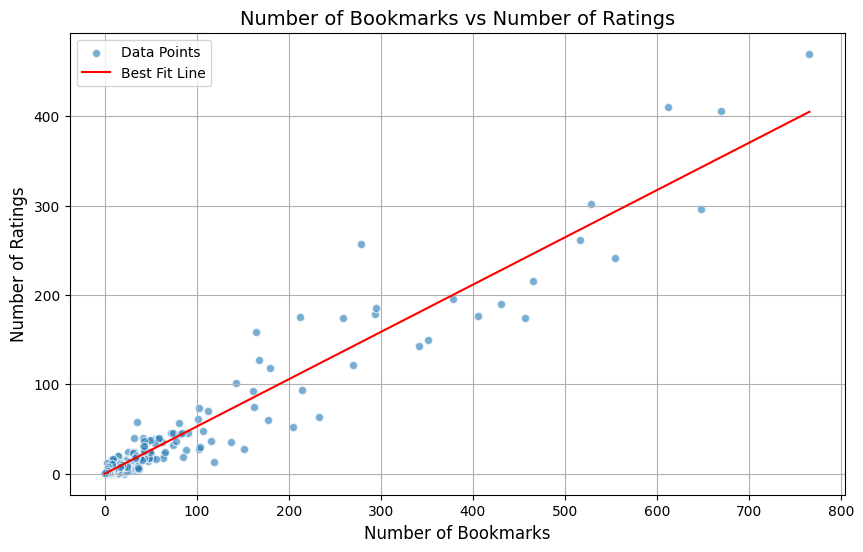

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean["Number of Bookmarks"], df_clean["Number of Ratings"], alpha=0.6, edgecolors='w', label="Data Points")

x = df_clean["Number of Bookmarks"]
y = df_clean["Number of Ratings"]

m, b = np.polyfit(x, y, 1)
print(m)
print(b)
plt.plot(x, m * x + b, color='red', label="Best Fit Line")
plt.xlabel("Number of Bookmarks", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.title("Number of Bookmarks vs Number of Ratings", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('Figuras/ratings_bookmarks_corr.png', bbox_inches='tight')
plt.show()

In [54]:
# Creación de una nueva variable para ver las horas media que trabaja cada restaurante
df_clean["Average Daily Hours"] = round(df_clean["Total Work Hours"] / 7, 2)
df_clean["Average Daily Hours"]

id
1      16.14
2      11.00
3       5.71
4      11.00
5       8.93
       ...  
744    12.43
745    12.93
746    13.93
747     7.43
748     8.00
Name: Average Daily Hours, Length: 741, dtype: float64

In [55]:
df_clean[["Website", "Instagram", "Facebook"]]

Website  \
id                                          
1             http://www.freedomcakes.es/   
2                https://madmadvegan.com/   
3        http://www.frutasprohibidas.com/   
4                https://madmadvegan.com/   
5            https://www.flowerburger.it/   
..                                    ...   
744                            No website   
745                            No website   
746        http://www.lahuellavegana.com/   
747            http://kamadoasianfood.es/   
748  https://www.sibuyaurbansushibar.com/   

                                           Instagram  \
id                                                     
1              http://www.instagram.com/freedomcakes   
2               http://www.instagram.com/madmadvegan   
3       http://www.instagram.com/frutasprohibidasbar   
4               http://www.instagram.com/madmadvegan   
5           http://www.instagram.com/flowerburger_es   
..                                               ...   
744                                     No instagram   
745         http://www.instagram.com/adagiogelateria   
746                                     No instagram   
747                                     No instagram   
748  http://www.instagram.com/sibuya_urban_sushi_bar   

                                    Facebook  
id                                            
1      http://facebook.com/Freedomcakesvegan  
2            http://facebook.com/MADMADVEGAN  
3    http://facebook.com/frutasprohibidasbar  
4            http://facebook.com/MADMADVEGAN  
5        http://facebook.com/flowerburger.it  
..                                       ...  
744  http://facebook.com/MorganoCraftedBeers  
745      http://facebook.com/adagiogelateria  
746       http://facebook.com/lahuellavegana  
747      http://facebook.com/Kamadoasianfood  
748     http://facebook.com/sibuyaurbansushi  

[741 rows x 3 columns]

In [56]:
df = df_clean # Actualizar el dataframe original

### Transformación de columnas `Website`, `Instagram` y `Facebook` en valores numéricos

Esta sección del código mapea los valores de las columnas `Website`, `Instagram` y `Facebook` a valores binarios (0 o 1) para indicar si existe un enlace asociado. Esto se ha hecho para poder ver si hay correlaciones de estas variables con otras numéricas, es decir, se quiere convertir datos categóricos en un formato numérico.

1. **Función `map_links`**:
   - Verifica si el valor de la columna comienza con `"No"` (por ejemplo, `"No Website"` o `"No Instagram"`):
     - Si es así, devuelve `0` para indicar que no hay enlace.
     - En caso contrario, devuelve `1` para indicar que sí existe un enlace.

2. **Aplicación de la función**:
   - Se utiliza `.apply(map_links)` en cada columna (`Website`, `Instagram`, `Facebook`) para transformar los valores string en 0 o 1.

3. **Resultado**:
   - Las columnas originales (`Website`, `Instagram`, `Facebook`) ahora contienen solo valores binarios:
     - `0`: No hay enlace.
     - `1`: Hay un enlace disponible.

In [57]:
def map_links(value):
    if value.startswith("No"):
        return 0
    else:
        return 1


In [58]:
df["Website"] = df["Website"].apply(map_links)
df["Instagram"] = df["Instagram"].apply(map_links)
df["Facebook"] = df["Facebook"].apply(map_links)
df[["Website", "Instagram", "Facebook"]]

Website  Instagram  Facebook
id                               
1          1          1         1
2          1          1         1
3          1          1         1
4          1          1         1
5          1          1         1
..       ...        ...       ...
744        0          0         1
745        0          1         1
746        1          0         1
747        1          0         1
748        1          1         1

[741 rows x 3 columns]

1. **Columna `Total Social Media`**:
   - **Propósito**: Cuenta cuántas de las tres plataformas `Website`, `Instagram`, `Facebook` tienen un enlace disponible para cada fila.
   - **Cálculo**: 
     - Se aplica una función `lambda` a cada fila (`axis=1`).
     - Para cada fila, verifica si los valores de las columnas son `1` (es decir, si hay enlace) y los suma.
   - Resultado:
     - La columna muestra el número total de plataformas con enlaces para cada restaurante, con valores entre `0` (sin redes) y `3` (todas las plataformas disponibles).

---

2. **Columna `Has Social Media`**:
   - **Propósito**: Indica si al menos una de las tres plataformas tiene un enlace disponible.
   - **Cálculo**: 
     - Se aplica una función `lambda` que revisa si al menos un valor de las columnas es `1` (usando `any()`).
     - Si al menos una plataforma tiene un enlace, devuelve `1`; de lo contrario, devuelve `0`.
   - Resultado:
       - `1`: Tiene al menos una red social o sitio web disponible.
       - `0`: No tiene presencia en ninguna red social o sitio web.

In [59]:
df["Total Social Media"] = df[["Website", "Instagram", "Facebook"]].apply(lambda row: sum(value == 1 for value in row), axis=1)

In [60]:
df["Has Social Media"] = df[['Website', 'Instagram', 'Facebook']].apply(lambda row: 1 if any(value == 1 for value in row) else 0, axis=1)

In [61]:
df[["Total Social Media", "Has Social Media"]]

Total Social Media  Has Social Media
id                                       
1                     3                 1
2                     3                 1
3                     3                 1
4                     3                 1
5                     3                 1
..                  ...               ...
744                   1                 1
745                   2                 1
746                   2                 1
747                   2                 1
748                   3                 1

[741 rows x 2 columns]

### Transformación de precios

Se utiliza el diccionario `transform_prices` para mapear los valores de texto de la columna `Price Range` a números:
- `"Barato" -> 1`, `"Moderado" -> 2`, `"Caro" -> 3`, `"No price range" -> 0`.

El método `df.replace(transform_prices)` realiza esta sustitución, convirtiendo la información categórica en valores numéricos para facilitar el análisis y procesamiento de datos.


In [62]:
transform_prices = {
    "Barato": 1,
    "Moderado": 2,
    "Caro": 3,
    "No price range": 0
}
df = df.replace(transform_prices)

C:\Users\Anton\AppData\Local\Temp\ipykernel_2928\1800466827.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(transform_prices)


In [63]:
df["Price Range"]

id
1      2
2      2
3      2
4      2
5      1
      ..
744    1
745    0
746    2
747    2
748    2
Name: Price Range, Length: 741, dtype: int64

### Cálculo de la popularidad

1. **Normalización de datos**:
   - Se utiliza `MinMaxScaler` de `sklearn` para escalar las columnas seleccionadas entre 0 y 1.
   - Esto asegura que las distintas variables, con rangos diferentes, sean comparables.

2. **Creación de DataFrame normalizado**:
   - Las columnas normalizadas (`Normalized Ratings`, `Normalized Bookmarks`, `Normalized Rating`, `Normalized Social Media`, `Normalized Price`) se almacenan en un nuevo DataFrame `df_norm`.

3. **Cálculo de la columna `Popularity`**:
   - Se define una métrica de popularidad ponderada basada en las variables normalizadas:
     - `Normalized Ratings`: 40% del peso.
     - `Normalized Rating`: 20% del peso.
     - `Normalized Bookmarks`: 20% del peso.
     - `Normalized Social Media`: 10% del peso.
     - `Normalized Price`: 10% del peso.
   - El resultado se almacena en la columna `Popularity` del DataFrame original `df`.

4. **Resultado**:
   - `df['Popularity']` representa una métrica combinada de la popularidad de cada restaurante, basada en factores como valoraciones, marcadores, redes sociales y rango de precios.

---

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame()
df_norm[['Normalized Ratings', 'Normalized Bookmarks', 'Normalized Rating', 'Normalized Social Media', 'Normalized Price']] = scaler.fit_transform(
    df[['Number of Ratings', 'Number of Bookmarks', 'Restaurant Rating', 'Total Social Media', 'Price Range']])
    
df["Popularity"] = (
    df_norm["Normalized Ratings"] * 0.4 +  
    df_norm["Normalized Rating"] * 0.20 +  
    df_norm["Normalized Bookmarks"] * 0.2 + 
    df_norm["Normalized Social Media"] * 0.1 + 
    df_norm["Normalized Price"] * 0.1
)
df_norm

Normalized Ratings  Normalized Bookmarks  Normalized Rating  \
0              1.000000              1.000000                0.9   
1              0.872340              0.798956                1.0   
2              0.512766              0.724543                1.0   
3              0.459574              0.607050                0.9   
4              0.029787              0.061358                0.9   
..                  ...                   ...                ...   
736            0.002128              0.002611                0.8   
737            0.002128              0.000000                0.8   
738            0.065957              0.054830                0.9   
739            0.006383              0.002611                0.5   
740            0.002128              0.000000                0.8   

     Normalized Social Media  Normalized Price  
0                   1.000000          0.666667  
1                   1.000000          0.666667  
2                   1.000000          0.666667  
3                   1.000000          0.666667  
4                   1.000000          0.333333  
..                       ...               ...  
736                 0.333333          0.333333  
737                 0.666667          0.000000  
738                 0.666667          0.666667  
739                 0.666667          0.666667  
740                 1.000000          0.666667  

[741 rows x 5 columns]

### Histograma de Popularidad

Se crea un histograma para visualizar la distribución de la métrica `Popularity`, dividiendo los valores en 20 intervalos (`bins=20`). Se ajusta el tamaño del gráfico y se guarda como un archivo PNG (`popularity.png`). Este gráfico muestra cómo se distribuyen los restaurantes según su popularidad.


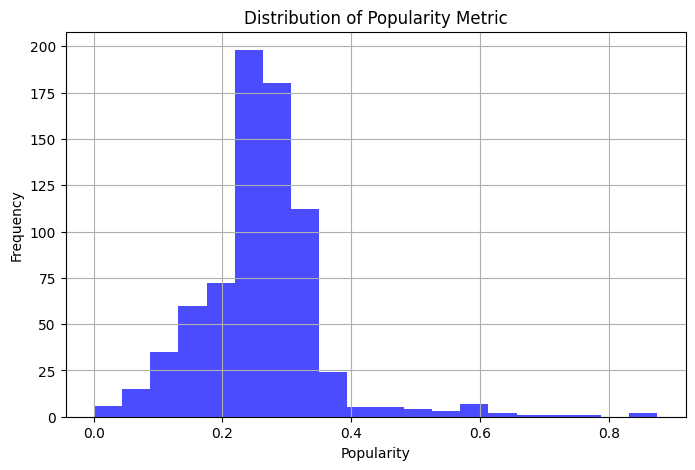

In [72]:
df['Popularity'].hist(bins=20, figsize=(8, 5), alpha=0.7, color='blue')
plt.title('Distribution of Popularity Metric')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.savefig('Figuras/popularity.png', bbox_inches='tight')
plt.show()

### La Matriz de Correlaciones

1. **Selección de columnas numéricas**:
   - Se seleccionan solo columnas numéricas del DataFrame, excluyendo `id`, `Lat` y `Long` para evitar datos irrelevantes.

2. **Cálculo de la matriz de correlación**:
   - Se utiliza la función `corr()` para calcular las correlaciones entre las columnas numéricas seleccionadas.

3. **Heatmap de la matriz de correlaciones**:
   - Se visualiza con `sns.heatmap`:
     - **`annot=True`**: Muestra los valores de correlación en el gráfico.
     - **`cmap='coolwarm'`**: Aplica un esquema de colores.
     - **`fmt=".2f"`**: Limita los valores a 2 decimales.

4. **Etiquetas y diseño**:
   - Las etiquetas de los ejes X se rotan para mejorar la visualización.
   - Se guarda como un archivo PNG (`matriz_correlaciones.png`).

El resultado permite identificar relaciones significativas entre las variables numéricas.

Como se puede ver solo hay dos variables que tienen una fuerte relación, `Number of Bookmarks`y `Number of Ratings`.

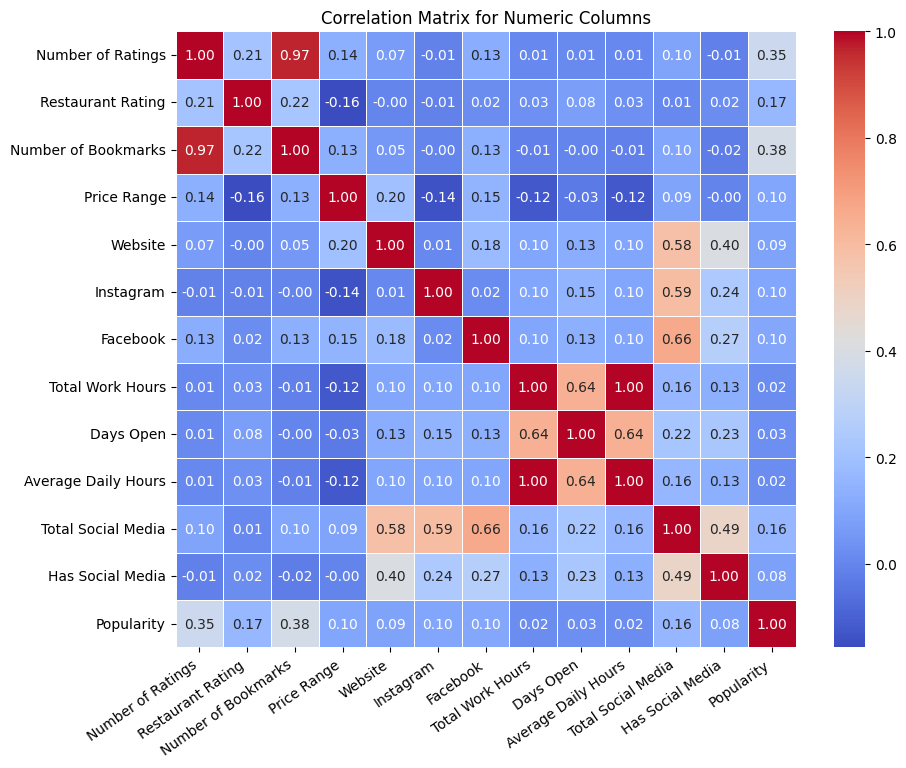

In [66]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols = numeric_cols.loc[: , ~numeric_cols.columns.isin(["id", "Lat", "Long"])] # Exclude id, Lat, Long columns
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.savefig('Figuras/matriz_correlaciones.png', bbox_inches='tight')
plt.show()

### Gráfico de Dispersión: Work Hours vs Popularity

Este gráfico de dispersión muestra la relación entre las horas totales de trabajo y la métrica de popularidad. 

- Cada punto representa un restaurante.
- Se añaden etiquetas a los ejes y una cuadrícula para facilitar la interpretación.

Como se puede observar la cantidad de horas que trabaja un restaurante no influye en su popularidad.


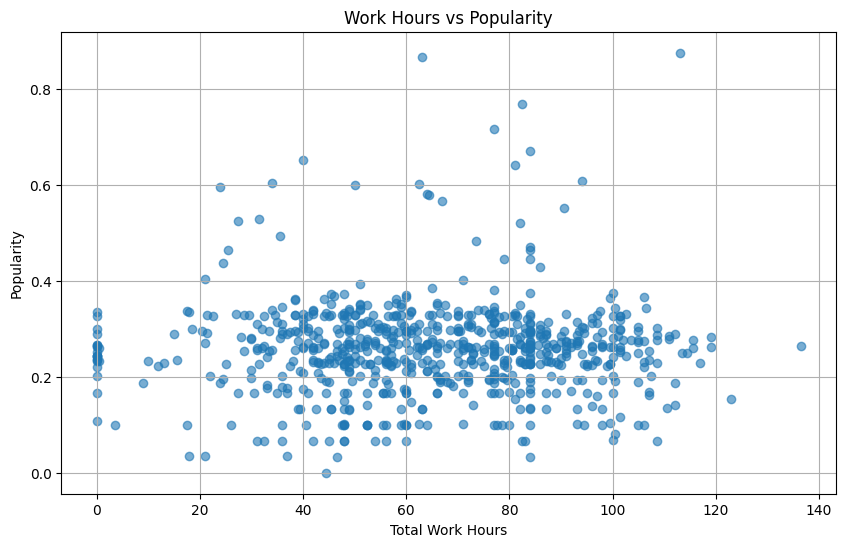

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Work Hours'], df['Popularity'], alpha=0.6)
plt.title('Work Hours vs Popularity')
plt.xlabel('Total Work Hours')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()